In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def map_ranges(inputValue: float, inMin: float, inMax: float, outMin: float, outMax: float):
    """
    Map a given value from range 1 -> range 2
    :param inputValue: The value you want to map
    :param inMin: Minimum Value of Range 1
    :param inMax: Maximum Value of Range 1
    :param outMin: Minimum Value of Range 2
    :param outMax: Maximum Value of Range 2
    :return: The new Value in Range 2
    """
    slope = (outMax - outMin) / (inMax - inMin)
    return outMin + slope * (inputValue - inMin)

In [3]:
img = cv2.imread("src/Images/cat256.jpg", flags=cv2.IMREAD_GRAYSCALE)
src = cv2.imread("src/Images/cat256.jpg")
shape = img.shape
img_size = shape[0]*shape[1]
print(img)
print(shape)
print(img_size)

[[ 11  10  11 ...  24  28  30]
 [ 13  11  13 ...  27  30  32]
 [ 14  14  14 ...  31  33  35]
 ...
 [114 113 116 ...  91  89  89]
 [115 116 119 ...  89  90  88]
 [117 119 121 ...  88  91  90]]
(256, 256)
65536


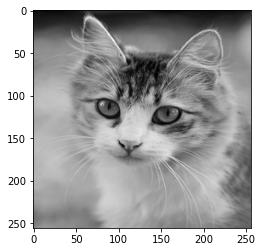

In [4]:
imgplot = plt.imshow(img, cmap="gray")

In [5]:
hist, bins = np.histogram(img.ravel(), 256, [0,256])
print(hist)
print(bins)

[ 10   7  15  20  23  28  22  27  39  46  77  66  74 123 115 122 123 138
 129  91 129 157 165 180 167 193 204 139 168 170 178 170 183 213 152 154
 147 165 134 150 146 144 135 138 142 142 136  96 132 134 138 125 135 111
 126 110 135 129 105 110 126 124 132 115 105  92 118 134 125 135 121 115
 135 137 151 125 140 150 142 166 141 156 193 188 181 186 199 215 220 230
 219 233 243 242 266 268 264 248 251 284 276 294 256 314 269 252 296 325
 315 319 329 329 336 346 401 437 453 475 471 457 495 507 540 535 555 546
 570 589 624 669 686 699 714 673 703 682 733 686 679 707 697 765 754 774
 801 812 840 793 729 745 793 845 803 769 772 825 774 876 880 861 784 772
 711 712 678 637 696 675 690 680 717 730 634 617 606 557 482 382 334 279
 256 254 201 240 209 203 184 194 160 185 172 131 134 120 140 111 106  86
  87  62  66  47  25  25  25  19  14   6   5   6   5   3   1   3   4   3
   3   3   1   2   0   2   2   3   3   0   0   2   2   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0   0   0   

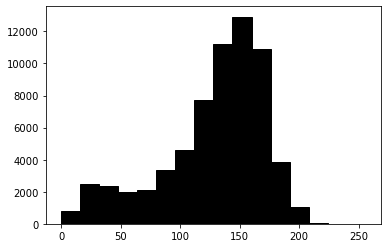

In [6]:
plt.hist(img.ravel(), bins=16, range=[0, 256], fc='k', ec='k')
plt.show()

In [7]:
# Compute the discrete PDF (Probability distribution function)
pr = hist / img_size

# Compute the discrete CDF (Accumulative Histogram)
acc = []
temp = 0
for i in range(256):
    temp += pr[i]
    acc.append(temp)
acc = np.array(acc) * (shape[0]-1)
sk = np.round(acc)
print(sk)

[  0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   2.   2.
   3.   3.   4.   4.   5.   5.   6.   6.   7.   7.   8.   9.  10.  10.
  11.  12.  12.  13.  14.  14.  15.  16.  16.  17.  17.  18.  19.  19.
  20.  20.  21.  21.  22.  22.  23.  23.  24.  24.  25.  25.  26.  26.
  27.  27.  28.  28.  28.  29.  29.  30.  30.  31.  31.  32.  32.  33.
  33.  34.  34.  35.  35.  36.  36.  37.  37.  38.  39.  39.  40.  41.
  41.  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  60.  61.  62.  63.  64.  65.  67.  68.  69.
  70.  72.  73.  75.  77.  79.  81.  82.  84.  86.  88.  90.  93.  95.
  97.  99. 102. 104. 107. 110. 112. 115. 118. 120. 123. 126. 129. 131.
 134. 137. 140. 143. 146. 149. 152. 156. 158. 161. 164. 168. 171. 174.
 177. 180. 183. 186. 190. 193. 196. 199. 202. 205. 207. 210. 213. 215.
 218. 221. 223. 226. 229. 231. 233. 236. 237. 239. 240. 241. 242. 243.
 244. 245. 246. 247. 247. 248. 249. 249. 250. 251. 251. 252. 252. 253.
 253. 

In [8]:
# map the pixels values
new_img = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        new_img[i][j] = sk[j]



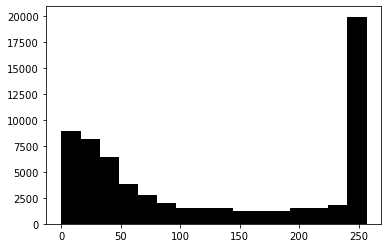

In [9]:
plt.hist(new_img.ravel(), bins=16, range=[0, 256], fc='k', ec='k')
plt.show()

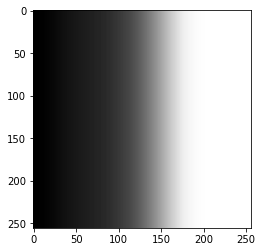

In [10]:
imgplot2 = plt.imshow(new_img, cmap="gray")

In [11]:
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
cv2.imshow('Source image', src)
cv2.imshow('Equalized Image', dst)
cv2.imshow('de7k', new_img)
cv2.waitKey()

-1

In [12]:
print(dst)

[[ 1  1  1 ...  8 11 12]
 [ 2  1  2 ... 10 12 14]
 [ 3  3  3 ... 13 14 16]
 ...
 [73 72 77 ... 47 45 45]
 [75 77 82 ... 45 46 45]
 [79 82 86 ... 45 47 46]]


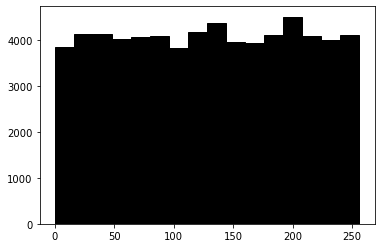

In [13]:
plt.hist(dst.ravel(), bins=16, range=[0, 256], fc='k', ec='k')
plt.show()

In [20]:
import numpy as np 

def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

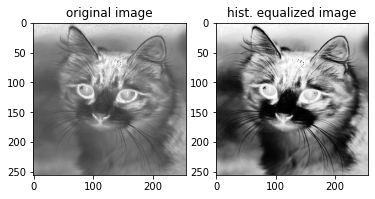

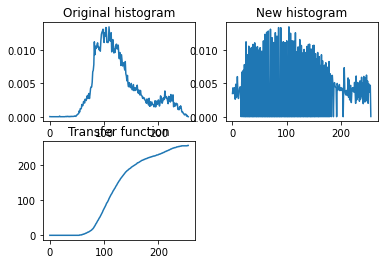

In [21]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('src/Images/cat256.jpg')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + \
  		np.uint8(0.7152 * img[:,:,1]) +\
			 np.uint8(0.0722 * img[:,:,2]))

# use hist module from hist.py to perform histogram equalization
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()